# Bonus Challenge: Spiral Data Classification

Now that you completed Challenge 2, you know you can use the Tensorflow Playground to experiment the hyperparameters of your deep learning model. If you are brave enough to take on this challenge, we present you the spiral data generated by codes and you will replicate your model built visually in the Tensorflow Playground with Python codes.

Below are the codes to generate the spiral dataset. Read the remarks and execute the codes.

In [1]:
from math import hypot, cos, sin
import numpy as np
import pandas as pd

"""
A function to generate X/Y data points that will form a spiral.
"""
def spiral(radius, step, resolution=.1, angle=0.0, start=0.0):
    dist = start
    coords=[]
    while dist*hypot(cos(angle),sin(angle))<radius:
        cord=[]
        cord.append(dist*cos(angle))
        cord.append(dist*sin(angle))
        coords.append(cord)
        dist+=step
        angle+=resolution
    return coords

In [2]:
# Generate two sets of spiral data points with opposite angles
data_1 = np.array(spiral(1000, 5, angle=0))
data_2 = np.array(spiral(1000, 5, angle=180))

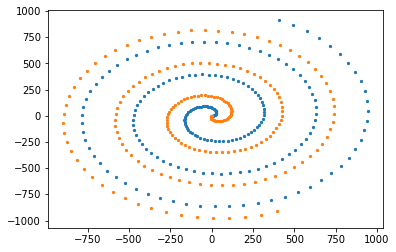

In [3]:
# Plot the two datasets to visualize the spirals

import matplotlib.pyplot as plt

a, b = data_1.T
plt.scatter(a, b, s=5)

aa, bb = data_2.T
plt.scatter(aa, bb, s=5)

plt.show()

In [4]:
# Combine the two spiral datasets into one

df1 = pd.DataFrame(data=data_1, columns=["X", "Y"])
df1["CLASS"] = 0

df2 = pd.DataFrame(data=data_2, columns=["X", "Y"])
df2["CLASS"] = 1

df = df1.append(df2)
df['CLASS'].value_counts()

0    201
1    200
Name: CLASS, dtype: int64

Now, build a neural network with Tensorflow to classify `df`. See how low data loss and how high accuracy can you achieve!

In [8]:
# split target from independent variables
X = df[['X', 'Y']]
y = df.Y

In [10]:
# test-train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

In [11]:
# check dataset shape
print(X.shape)
print(y.shape)

(401, 2)
(401,)


In [39]:
# build model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(8, activation='tanh', input_dim=2))
model.add(Dense(8, activation='tanh'))
#model.add(Dense(8, activation='tanh'))
#model.add(Dense(8, activation='tanh'))
#model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.03), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [40]:
model.fit(X_train, y_train, epochs=200, batch_size = 10)

Epoch 1/200
20/20 [==============================] - 3s 10ms/step - loss: -1130.7159 - accuracy: 0.0100
Epoch 2/200
20/20 [==============================] - 0s 10ms/step - loss: -2851.3362 - accuracy: 0.0100
Epoch 3/200
20/20 [==============================] - 0s 10ms/step - loss: -4488.5220 - accuracy: 0.0100
Epoch 4/200
20/20 [==============================] - 0s 11ms/step - loss: -6039.8662 - accuracy: 0.0100
Epoch 5/200
20/20 [==============================] - 0s 10ms/step - loss: -7604.4614 - accuracy: 0.0100
Epoch 6/200
20/20 [==============================] - 0s 10ms/step - loss: -9088.7656 - accuracy: 0.0100
Epoch 7/200
20/20 [==============================] - 0s 10ms/step - loss: -10622.7871 - accuracy: 0.0100
Epoch 8/200
20/20 [==============================] - 0s 10ms/step - loss: -12131.3135 - accuracy: 0.0100
Epoch 9/200
20/20 [==============================] - 0s 10ms/step - loss: -13615.6836 - accuracy: 0.0100
Epoch 10/200
20/20 [==============================] - 0s 10ms

20/20 [==============================] - 0s 10ms/step - loss: -111333.1172 - accuracy: 0.0100
Epoch 77/200
20/20 [==============================] - 0s 10ms/step - loss: -112788.1719 - accuracy: 0.0100
Epoch 78/200
20/20 [==============================] - 0s 11ms/step - loss: -114252.0391 - accuracy: 0.0100
Epoch 79/200
20/20 [==============================] - 0s 10ms/step - loss: -115683.8125 - accuracy: 0.0100
Epoch 80/200
20/20 [==============================] - 0s 10ms/step - loss: -117118.5703 - accuracy: 0.0100
Epoch 81/200
20/20 [==============================] - 0s 10ms/step - loss: -118580.6094 - accuracy: 0.0100
Epoch 82/200
20/20 [==============================] - 0s 11ms/step - loss: -120029.1016 - accuracy: 0.0100
Epoch 83/200
20/20 [==============================] - 0s 13ms/step - loss: -121470.0234 - accuracy: 0.0100
Epoch 84/200
20/20 [==============================] - 0s 13ms/step - loss: -122927.5078 - accuracy: 0.0100
Epoch 85/200
20/20 [==============================

20/20 [==============================] - 0s 9ms/step - loss: -219792.9531 - accuracy: 0.0100
Epoch 152/200
20/20 [==============================] - 0s 10ms/step - loss: -221238.7344 - accuracy: 0.0100
Epoch 153/200
20/20 [==============================] - 0s 10ms/step - loss: -222681.0156 - accuracy: 0.0100
Epoch 154/200
20/20 [==============================] - 0s 9ms/step - loss: -224151.7344 - accuracy: 0.0100
Epoch 155/200
20/20 [==============================] - 0s 10ms/step - loss: -225560.2812 - accuracy: 0.0100
Epoch 156/200
20/20 [==============================] - 0s 9ms/step - loss: -227007.7344 - accuracy: 0.0100
Epoch 157/200
20/20 [==============================] - 0s 10ms/step - loss: -228461.0156 - accuracy: 0.0100
Epoch 158/200
20/20 [==============================] - 0s 10ms/step - loss: -229924.2656 - accuracy: 0.0100
Epoch 159/200
20/20 [==============================] - 0s 10ms/step - loss: -231341.4375 - accuracy: 0.0100
Epoch 160/200
20/20 [========================

In [18]:
# plot scores
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {} \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {} \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))  

Accuracy on training data: 0.0 
 Error on training data: 1.0
Accuracy on test data: 0.0 
 Error on test data: 1.0
